## Table of Contents

### 1. Importing libraries and data
### 2. Creating subset 'private'
### 3. Addressing missing values for cost
### 4. Exporting data set

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [3]:
# Define path
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [4]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [5]:
# Import data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'scorecard_data_cleaned.pkl'))

In [6]:
# Change options to display all columns
pd.options.display.max_columns = None

In [7]:
# Check head
df.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8986,0.8986,430.0,520.0,420.0,510.0,370.0,457.0,475.0,465.0,414.0,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,957.0,957.0,0.0,4990.0,0.0186,0.9120,0.0088,0.0018,0.0022,0.0016,0.0118,0.0070,0.0361,0.0587,1,14444.0,NaN,13893.0,13976.0,15995.0,18957.0,17140.0,NaN,NaN,NaN,NaN,NaN,13913.0,NaN,14684.0,NaN,18281.0,NaN,592.0,NaN,375.0,113.0,61.0,27.0,16.0,NaN,NaN,NaN,NaN,NaN,22489.0,NaN,9744.0,18354.0,NaN,7413.0,5384.0,7101.0,0.7411,0.7067,0.8987,0.6087,NaN,1.0000,NaN,0.7503,0.0758,0.602009,0.098870,0.569140,0.901587,0.365828,0.189893,0.105148,0.062147,0.040804,0.203413,NaN,NaN,NaN,0.066667,NaN,NaN,NaN,0.016422,0.349406,0.634172,0.729127,0.566855,0.457941,0.363151,34779.085684,10340.346032,15500.0,33375.0,10250.0,15500.0,16000.0,14518.0,15000.0,19000.0,17500.0,10250.0,17500.0,14250.0,15000.0,1642

In [8]:
# Get shape of dataframe
df.shape

(6806, 260)

In [9]:
# Get info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Columns: 260 entries, UNITID to FEDSCHCD
dtypes: float64(237), int64(14), object(9)
memory usage: 13.5+ MB


# 02. Creating subset 'private'

In [10]:
# Create subset of private, non-profit institutions
private = df[df['CONTROL'] == 2]

In [11]:
# Check output
private.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,351.0,0.2393,0.7151,0.0171,0.0057,0.0057,0.0000,0.0000,0.0000,0.0171,0.5014,1,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,0.0,17680.0,NaN,6900.0,6900.0,NaN,14273.0,4206.0,4292.0,1.0000,0.7673,0.0035,NaN,NaN,NaN,NaN,0.8962,0.8302,0.773649,0.895270,NaN,NaN,0.512500,0.114865,0.064189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050000,0.462500,0.487500,0.594595,0.337838,0.243243,0.158784,25211.032258,20596.158491,10500.0,27334.0,9500.0,9500.0,19000.0,25000.0,7646.0,12038.0,9500.0,15509.0,9500.0,17025.0,11500.0,9500.0,514.0,92.0,422.0,397.0,91.0,26.0,60.0,454.0,464.0,50.0,327.0,187.0,458.0,56.0,283.680678,398.0,38455.0,24

In [12]:
# Check shape
private.shape

(2006, 260)

In [13]:
# Get info about dataframe
private.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 2 to 6777
Columns: 260 entries, UNITID to FEDSCHCD
dtypes: float64(237), int64(14), object(9)
memory usage: 4.0+ MB


In [14]:
# Reset index for private
private = private.reset_index(drop = True)

In [15]:
# Check output
private.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
0,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,351.0,0.2393,0.7151,0.0171,0.0057,0.0057,0.0000,0.0000,0.0000,0.0171,0.5014,1,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,0.0,17680.0,NaN,6900.0,6900.0,NaN,14273.0,4206.0,4292.0,1.0000,0.7673,0.0035,NaN,NaN,NaN,NaN,0.8962,0.8302,0.773649,0.895270,NaN,NaN,0.512500,0.114865,0.064189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050000,0.462500,0.487500,0.594595,0.337838,0.243243,0.158784,25211.032258,20596.158491,10500.0,27334.0,9500.0,9500.0,19000.0,25000.0,7646.0,12038.0,9500.0,15509.0,9500.0,17025.0,11500.0,9500.0,514.0,92.0,422.0,397.0,91.0,26.0,60.0,454.0,464.0,50.0,327.0,187.0,458.0,56.0,283.680678,398.0,38455.0,24

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COSTT4_A', ylabel='Density'>

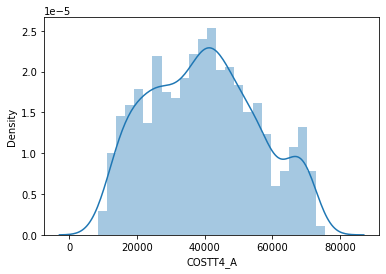

In [16]:
# Get histogram of average cost of attendance
sns.distplot(private['COSTT4_A'], bins = 25)

In [17]:
# Create lower cost category
private.loc[private['COSTT4_A'] < 20000, 'COST_CATEGORY'] = 'Lower cost'

In [18]:
# Create middle cost category
private.loc[(private['COSTT4_A'] >= 20000) & (private['COSTT4_A'] < 55000), 'COST_CATEGORY'] = 'Middle cost'

In [19]:
# Create higher cost category
private.loc[private['COSTT4_A'] >= 55000, 'COST_CATEGORY'] = 'Higher cost'

In [20]:
# Get value counts of COST_CATEGORY column
private['COST_CATEGORY'].value_counts(dropna = False)

Middle cost    941
NaN            630
Higher cost    258
Lower cost     177
Name: COST_CATEGORY, dtype: int64

In [21]:
# Keep specific columns for subset of private institutions
private = private[['UNITID', 'NAME', 'CITY', 'STATE', 'ZIP', 'REGION', 'LOCALE', 'COSTT4_A', 'NPT4_PRIV', 'DEBT_MDN', 'FAMINC', 'ADM_RATE', 'SAT_AVG', 'UGDS', 'RET_FT4_POOLED', 'UGDS_WHITE', 'COST_CATEGORY']]

In [22]:
# Check output
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100690,Amridge University,Montgomery,AL,36117-3553,5,12.0,17680.0,15322.0,10500.0,21079.472973,NaN,NaN,351.0,0.2143,0.2393,Lower cost
1,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
2,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
3,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
4,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost


In [23]:
# Check shape
private.shape

(2006, 17)

In [24]:
# Get info
private.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          2006 non-null   int64  
 1   NAME            2006 non-null   object 
 2   CITY            2006 non-null   object 
 3   STATE           2006 non-null   object 
 4   ZIP             2006 non-null   object 
 5   REGION          2006 non-null   int64  
 6   LOCALE          1859 non-null   float64
 7   COSTT4_A        1376 non-null   float64
 8   NPT4_PRIV       1453 non-null   float64
 9   DEBT_MDN        1549 non-null   float64
 10  FAMINC          1661 non-null   float64
 11  ADM_RATE        1190 non-null   float64
 12  SAT_AVG         783 non-null    float64
 13  UGDS            1620 non-null   float64
 14  RET_FT4_POOLED  1306 non-null   float64
 15  UGDS_WHITE      1620 non-null   float64
 16  COST_CATEGORY   1376 non-null   object 
dtypes: float64(10), int64(2), object(

# 03. Addressing missing values for cost

In [25]:
# Check number of missing values
private.isnull().sum()

UNITID               0
NAME                 0
CITY                 0
STATE                0
ZIP                  0
REGION               0
LOCALE             147
COSTT4_A           630
NPT4_PRIV          553
DEBT_MDN           457
FAMINC             345
ADM_RATE           816
SAT_AVG           1223
UGDS               386
RET_FT4_POOLED     700
UGDS_WHITE         386
COST_CATEGORY      630
dtype: int64

In [26]:
# Get list of rows with missing cost values
private[private['COSTT4_A'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
5,101453,Heritage Christian University,Florence,AL,35630-9977,5,13.0,NaN,NaN,NaN,33173.640000,NaN,NaN,49.0,0.7647,0.7551,NaN
16,102395,United States Sports Academy,Daphne,AL,36526-7055,5,13.0,NaN,NaN,13078.0,36311.690141,NaN,NaN,266.0,NaN,0.6165,NaN
21,104665,School of Architecture at Taliesin,Scottsdale,AZ,85259,6,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,105367,Ottawa University-Phoenix,Phoenix,AZ,85021,6,11.0,NaN,NaN,12000.0,49555.756863,NaN,NaN,340.0,NaN,0.5588,NaN
32,107123,Jefferson Regional Medical Center School of Nu...,Pine Bluff,AR,71603,5,13.0,NaN,NaN,7493.0,40192.127907,NaN,NaN,70.0,NaN,0.7571,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,47503312,Relay Graduate School of Education - Dallas-Fo...,Dallas,TX,75232,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,47503313,Relay Graduate School of Education - Washingto...,Washington,DC,20002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,47503314,Relay Graduate School of Education - Atlanta,Atlanta,GA,30345,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,47503315,Relay Graduate School of Education - California,San Jose,CA,951103719,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Change options to display all rows
pd.options.display.max_rows = None

In [28]:
# Get list of rows with missing cost values
private[private['COSTT4_A'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
5,101453,Heritage Christian University,Florence,AL,35630-9977,5,13.0,NaN,NaN,NaN,33173.640000,NaN,NaN,49.0,0.7647,0.7551,NaN
16,102395,United States Sports Academy,Daphne,AL,36526-7055,5,13.0,NaN,NaN,13078.0,36311.690141,NaN,NaN,266.0,NaN,0.6165,NaN
21,104665,School of Architecture at Taliesin,Scottsdale,AZ,85259,6,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,105367,Ottawa University-Phoenix,Phoenix,AZ,85021,6,11.0,NaN,NaN,12000.0,49555.756863,NaN,NaN,340.0,NaN,0.5588,NaN
32,107123,Jefferson Regional Medical Center School of Nu...,Pine Bluff,AR,71603,5,13.0,NaN,NaN,7493.0,40192.127907,NaN,NaN,70.0,NaN,0.7571,NaN
39,108269,Academy of Chinese Culture and Health Sciences,Oakland,CA,94612,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,108861,American Baptist Seminary of the West,Berkeley,CA,94704-3029,8,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,108870,American Film Institute Conservatory,Los Angeles,CA,90027-1625,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,110316,California Institute of Integral Studies,San Francisco,CA,94103,8,11.0,NaN,NaN,18750.0,26409.270588,NaN,NaN,61.0,NaN,0.5246,NaN
55,111391,California Western School of Law,San Diego,CA,92101-3046,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Get rows with missing values for all continuous variables
private_null = private[private['COSTT4_A'].isnull() & private['DEBT_MDN'].isnull() & private['FAMINC'].isnull() & private['ADM_RATE'].isnull() & private['SAT_AVG'].isnull() & private['UGDS'].isnull() & private['RET_FT4_POOLED'].isnull() & private['UGDS_WHITE'].isnull()]

In [30]:
# Check output
private_null

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
21,104665,School of Architecture at Taliesin,Scottsdale,AZ,85259,6,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,108269,Academy of Chinese Culture and Health Sciences,Oakland,CA,94612,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,108861,American Baptist Seminary of the West,Berkeley,CA,94704-3029,8,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,108870,American Film Institute Conservatory,Los Angeles,CA,90027-1625,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,111391,California Western School of Law,San Diego,CA,92101-3046,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,112127,Church Divinity School of the Pacific,Berkeley,CA,94709-1211,8,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,112525,Western University of Health Sciences,Pomona,CA,91766-1854,8,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,113704,Dominican School of Philosophy & Theology,Berkeley,CA,94708-1816,8,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,114549,Fielding Graduate University,Santa Barbara,CA,93105-3538,8,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,114734,Franciscan School of Theology,Oceanside,CA,92057,8,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Get shape
private_null.shape

(233, 17)

In [32]:
# Remove rows with missing values for all continuous variables
private = private.dropna(subset = ['COSTT4_A', 'NPT4_PRIV', 'DEBT_MDN', 'FAMINC', 'ADM_RATE', 'SAT_AVG', 'UGDS', 'RET_FT4_POOLED', 'UGDS_WHITE'], how = 'all')

In [33]:
# Check new shape
private.shape

(1773, 17)

In [34]:
# Try getting number of missing values again
private.isnull().sum()

UNITID              0
NAME                0
CITY                0
STATE               0
ZIP                 0
REGION              0
LOCALE            121
COSTT4_A          397
NPT4_PRIV         320
DEBT_MDN          224
FAMINC            112
ADM_RATE          583
SAT_AVG           990
UGDS              153
RET_FT4_POOLED    467
UGDS_WHITE        153
COST_CATEGORY     397
dtype: int64

In [35]:
# Look at private institutions with missing values for cost
private[private['COSTT4_A'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
5,101453,Heritage Christian University,Florence,AL,35630-9977,5,13.0,NaN,NaN,NaN,33173.640000,NaN,NaN,49.0,0.7647,0.7551,NaN
16,102395,United States Sports Academy,Daphne,AL,36526-7055,5,13.0,NaN,NaN,13078.0,36311.690141,NaN,NaN,266.0,NaN,0.6165,NaN
22,105367,Ottawa University-Phoenix,Phoenix,AZ,85021,6,11.0,NaN,NaN,12000.0,49555.756863,NaN,NaN,340.0,NaN,0.5588,NaN
32,107123,Jefferson Regional Medical Center School of Nu...,Pine Bluff,AR,71603,5,13.0,NaN,NaN,7493.0,40192.127907,NaN,NaN,70.0,NaN,0.7571,NaN
48,110316,California Institute of Integral Studies,San Francisco,CA,94103,8,11.0,NaN,NaN,18750.0,26409.270588,NaN,NaN,61.0,NaN,0.5246,NaN
56,111638,Casa Loma College-Van Nuys,Van Nuys,CA,91405,8,11.0,NaN,24738.0,19500.0,37061.255556,0.9130,NaN,175.0,NaN,0.3714,NaN
57,111708,CET-San Diego,San Diego,CA,92102,8,11.0,NaN,17178.0,5894.0,17278.963278,NaN,NaN,174.0,NaN,0.1379,NaN
58,111717,CET-San Jose,San Jose,CA,95110,8,11.0,NaN,14728.0,5894.0,17278.963278,NaN,NaN,248.0,NaN,0.0524,NaN
59,111726,CET-El Centro,El Centro,CA,92243,8,13.0,NaN,6916.0,5894.0,17278.963278,NaN,NaN,230.0,NaN,0.0174,NaN
60,111744,CET-Colton,Colton,CA,92324,8,21.0,NaN,14146.0,5894.0,17278.963278,NaN,NaN,154.0,NaN,0.1039,NaN


In [36]:
# Remove rows where size is missing
private = private[private['COSTT4_A'].isnull() == False]

In [37]:
# Check output
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100690,Amridge University,Montgomery,AL,36117-3553,5,12.0,17680.0,15322.0,10500.0,21079.472973,NaN,NaN,351.0,0.2143,0.2393,Lower cost
1,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
2,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
3,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
4,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost


In [38]:
# Get tail
private.tail()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
1850,491710,Yeshiva Gedolah of Cliffwood,Keyport,NJ,07735-5105,2,21.0,14150.0,7150.0,NaN,NaN,0.5854,NaN,84.0,0.9500,1.0000,Lower cost
1851,491765,Yeshivas Emek Hatorah,Howell,NJ,07731-2444,2,21.0,27190.0,20141.0,NaN,NaN,NaN,NaN,46.0,NaN,1.0000,Middle cost
1852,491817,Seminary Bnos Chaim,Lakewood,NJ,08701-2336,2,13.0,19886.0,14145.0,NaN,NaN,0.8056,NaN,159.0,NaN,1.0000,Lower cost
1857,492801,Drury University-College of Continuing Profess...,Springfield,MO,65802,4,12.0,19707.0,14368.0,13275.0,NaN,NaN,NaN,1419.0,0.7568,0.8168,Lower cost
1858,492962,Indiana Institute of Technology-College of Pro...,Fort Wayne,IN,46803,3,11.0,20329.0,14061.0,11919.0,NaN,NaN,NaN,4456.0,0.5987,0.4165,Middle cost


In [39]:
# Reset index for private
private = private.reset_index(drop = True)

<AxesSubplot:xlabel='COSTT4_A'>

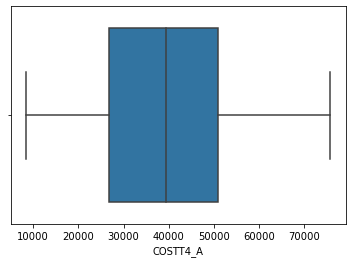

In [40]:
# Get boxplot
sns.boxplot(x = private['COSTT4_A'])

In [41]:
# Check new shape
private.shape

(1376, 17)

In [42]:
# Check new info
private.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          1376 non-null   int64  
 1   NAME            1376 non-null   object 
 2   CITY            1376 non-null   object 
 3   STATE           1376 non-null   object 
 4   ZIP             1376 non-null   object 
 5   REGION          1376 non-null   int64  
 6   LOCALE          1376 non-null   float64
 7   COSTT4_A        1376 non-null   float64
 8   NPT4_PRIV       1376 non-null   float64
 9   DEBT_MDN        1248 non-null   float64
 10  FAMINC          1338 non-null   float64
 11  ADM_RATE        1139 non-null   float64
 12  SAT_AVG         777 non-null    float64
 13  UGDS            1376 non-null   float64
 14  RET_FT4_POOLED  1265 non-null   float64
 15  UGDS_WHITE      1376 non-null   float64
 16  COST_CATEGORY   1376 non-null   object 
dtypes: float64(10), int64(2), object(

In [43]:
# Check new number of missing values
private.isnull().sum()

UNITID              0
NAME                0
CITY                0
STATE               0
ZIP                 0
REGION              0
LOCALE              0
COSTT4_A            0
NPT4_PRIV           0
DEBT_MDN          128
FAMINC             38
ADM_RATE          237
SAT_AVG           599
UGDS                0
RET_FT4_POOLED    111
UGDS_WHITE          0
COST_CATEGORY       0
dtype: int64

In [44]:
# Get descriptive stats
private.describe()

,UNITID,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1248.000000,1338.000000,1139.000000,777.000000,1376.000000,1265.000000,1376.000000
mean,218644.365552,4.027616,19.749273,39743.209302,21764.470930,16329.317308,61729.385965,0.652233,1150.454311,1890.738372,0.734069,0.559728
std,99481.435378,2.176060,9.606759,16040.649613,8217.959734,5167.608803,28886.146578,0.219649,135.181010,3572.059681,0.147038,0.262892
min,100690.000000,1.000000,11.000000,8415.000000,1466.000000,1834.000000,4180.539017,0.000000,809.000000,0.000000,0.000000,0.000000
25%,156397.250000,2.000000,11.000000,26817.000000,17112.750000,12250.000000,41408.464832,0.521850,1061.000000,392.500000,0.652600,0.405625
50%,195146.000000,4.000000,21.000000,39509.000000,21531.500000,16750.000000,60003.624054,0.676600,1128.000000,1091.500000,0.754200,0.610800
75%,224707.000000,5.000000,22.250000,51003.000000,26289.500000,19729.500000,79889.880434,0.812550,1209.000000,2104.250000,0.831200,0.749200
max,492962.000000,9.000000,43.000000,75735.000000,50794.000000,39375.000000,174263.250000,1.000000,1566.000000,80170.000000,1.000000,1.000000


# 04. Exporting data set

In [45]:
# Export private dataset as pickle file
private.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'private_data_incl_outliers.pkl'))

In [46]:
# Export as csv
private.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'private_data_incl_outliers.csv'))